**Biofuel_Detection**
```python
-By Ritu parna Banerjee
```



In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#tensorflow
import tensorflow as tf

#keras
import keras
from keras.models import Sequential
#from keras.preprocessing import image
#from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
#from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import   load_img
#from tensorflow.keras.preprocessing import load_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten

#using incepton v3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [3]:
#As here we are using inceptionV3 we need to resize all images as below.
classLabels = 11
imageSize = [224,224]
batchSize = 15

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load dataset

TrainDataset = "/content/drive/MyDrive/dataset/trained"
#TestDataset = "/content/drive/MyDrive/datasets/validation_set"

In [ ]:
#@title Model Development


In [6]:
#we are using inceptionV3 pre-trained model to train our model. As we need to define output layer based on our classlabels we need to remove it by setting inclide_top to false.
#resnet = ResNet50(input_shape=imageSize + [3],
                   # weights= "imagenet",
                    #include_top = False)

inception = InceptionV3(input_shape=imageSize + [3],
                    weights= "imagenet",
                    include_top = False)

87910968/87910968 [==============================] - 1s 0us/step


In [7]:
#for inner layers of inceptionV3 we no need to train them as they are all trained except the output layer whivh we already removed.
for layer in inception.layers:
  layer.trainable = False

In [8]:
x = Flatten()(inception.output)

In [9]:
#we will define the output layer as dense layer having softmax as activation as we are dealing with multi classification
outputLayer = Dense(classLabels, activation='softmax')(x)

In [10]:
 #so our final model is:

model = Model(inputs = inception.input, outputs = outputLayer)

In [11]:
#summary() method provides info of the parameters of dense layer which we need to optimise for training the model. Here we have 512 010 parameters.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
#@title Compile the model by adding optimiser,loss & metric


In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#@title Data Augmentation and scaling


In [13]:
trainDataGenerator = ImageDataGenerator(validation_split = 0.2,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'reflect')

In [14]:
# training & validation data generators

trainingData = trainDataGenerator.flow_from_directory(TrainDataset,
                                                 subset = 'training',
                                                 seed = 132,
                                                 target_size= (224,224),
                                                 batch_size = batchSize,
                                                 class_mode= 'categorical')

Found 239 images belonging to 11 classes.


In [15]:
validationData = trainDataGenerator.flow_from_directory(TrainDataset,
                                                 subset = 'validation',
                                                 seed = 132,
                                                 target_size = (224,224),
                                                 batch_size = batchSize,
                                                 class_mode= 'categorical')

Found 55 images belonging to 11 classes.


In [16]:
#@title Fit the model


In [17]:
trainHistory= model.fit_generator(
    trainingData,
    validation_data=validationData,
    epochs=9,
    steps_per_epoch=len(trainingData),
    validation_steps=len(validationData)
)

<ipython-input-17-3bf59a05a79c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  trainHistory= model.fit_generator(


Epoch 1/9
16/16 [==============================] - 136s 8s/step - loss: 7.3537 - accuracy: 0.4895 - val_loss: 4.9297 - val_accuracy: 0.5455
Epoch 2/9
16/16 [==============================] - 45s 3s/step - loss: 1.4645 - accuracy: 0.8368 - val_loss: 3.7540 - val_accuracy: 0.7818
Epoch 3/9
16/16 [==============================] - 48s 3s/step - loss: 0.4255 - accuracy: 0.9205 - val_loss: 5.2760 - val_accuracy: 0.6909
Epoch 4/9
16/16 [==============================] - 47s 3s/step - loss: 0.2262 - accuracy: 0.9833 - val_loss: 4.0702 - val_accuracy: 0.6545
Epoch 5/9
16/16 [==============================] - 48s 3s/step - loss: 0.0215 - accuracy: 0.9958 - val_loss: 3.2175 - val_accuracy: 0.7273
Epoch 6/9
16/16 [==============================] - 47s 3s/step - loss: 0.1929 - accuracy: 0.9707 - val_loss: 6.2888 - val_accuracy: 0.6545
Epoch 7/9
16/16 [==============================] - 46s 3s/step - loss: 0.2034 - accuracy: 0.9540 - val_loss: 3.7743 - val_accuracy: 0.7091
Epoch 8/9
16/16 [=========

In [18]:
df = pd.DataFrame(trainHistory.history)




Inception_v3 Model
------------------
Minimum  validation loss: 3.17
Maximum validation accuracy: 0.78


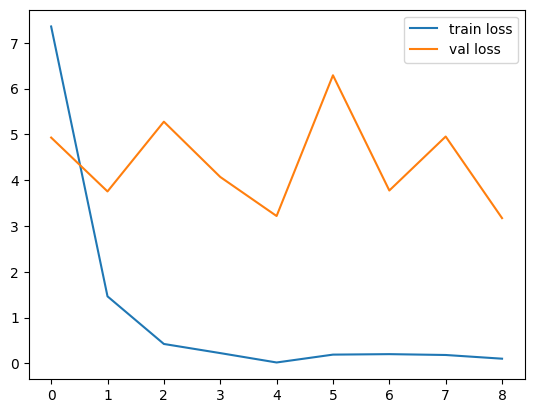

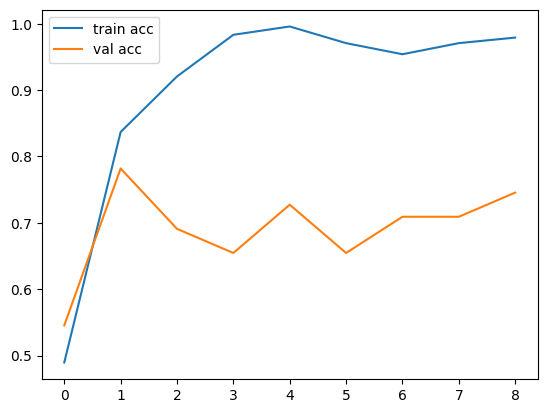

In [19]:

print("Inception_v3 Model")
print("------------------")
print(("Minimum  validation loss: {:0.2f}" +\
      "\nMaximum validation accuracy: {:0.2f}")\
      .format(df['val_loss'].min(),
              df['val_accuracy'].max()))

# plot the loss
import matplotlib.pyplot as plt
plt.plot(trainHistory.history['loss'], label='train loss')
plt.plot(trainHistory.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(trainHistory.history['accuracy'], label='train acc')
plt.plot(trainHistory.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')



In [ ]:
#@title Test other than validation & train data


In [20]:
model.save('Biofuel_inceptionV3_27Apr.h5')

In [21]:


# get the dictionary of classes
label2index = trainingData.class_indices

# obtain the list of classes
list_of_label = list(label2index.keys())
print("The list of classes: ", list_of_label)



The list of classes:  ['beetroot', 'coconut', 'corn', 'non-biofuel', 'palm', 'potato', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'woodchip']


In [24]:
from tensorflow.keras.preprocessing import image

In [25]:
img=image.load_img('/content/drive/MyDrive/dataset/tested/negetive/negative-1.jpg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255

x=np.expand_dims(x,axis=0)
test_image=preprocess_input(x)

In [26]:
predict = model.predict(test_image)

1/1 [==============================] - 2s 2s/step


In [27]:
a=int(np.argmax(predict, axis=1))

In [28]:
a

3

In [29]:
predictedlabel = list_of_label[a]

In [30]:
predictedlabel

'non-biofuel'